# ACA4—Social Network Analysis

## Author: Tianyi Dai 

In this analysis challenge assignment, I will analyze the social network of my friends.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Define SNA

In [5]:
SNAdata = pd.read_csv("ACA4_friends.csv", index_col = 0)

In [6]:
SNAdata

,Shelly,Shawn,Dolly,Cynthia,Iris,Chirs,BiBi,Xunyou,Nad,Stark
Shelly,0,1,1,1,1,1,1,1,1,1
Shawn,1,0,0,0,1,1,1,1,1,1
Dolly,1,0,0,1,1,0,0,0,0,0
Cynthia,1,0,1,0,1,0,0,0,0,0
Iris,1,1,1,1,0,1,0,0,0,1
Chirs,1,1,0,0,1,0,1,0,0,0
BiBi,1,1,0,0,0,1,0,0,1,1
Xunyou,1,1,0,0,0,0,1,1,0,0
Nad,1,1,0,0,0,0,1,0,0,1
Stark,1,1,0,0,1,0,1,0,1,0


The table above shows the connection of my friends. If they have connection, the number is 1. If not, it is 0.  
The nodes is my friends and I, ten people in total.    
Edges refer to the connections of friends, in other words, if there exist edge means they know each other.  

## 2. Visualize the network

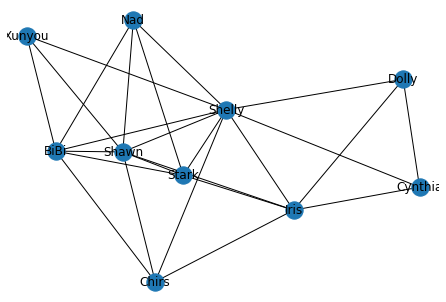

In [7]:
G = nx.Graph(SNAdata)
nx.draw(G, with_labels = True)

## 3. Describe the global network properties 

## 3.1 number of vertices

In [12]:
num_vertices = nx.number_of_nodes(G)
print('The number of vertices is: %d' % (num_vertices))

The number of vertices is: 10


## 3.2 number of edges

In [10]:
num_edges = nx.number_of_edges(G)
print('The number of edges is: %d' % (num_edges))

The number of edges is: 26


## 3.3 density

In [8]:
density = nx.density(G)
print('The edge density is: %.3f' % (density))

The edge density is: 0.578


This value of 0.578 indicates that this network is quite well-connected because we can see more than 57.8% links among all possible links. 

## 3.4 diameter

In [15]:
diameter = nx.diameter(G)
print('The edge diameter is: %.3f' % (diameter))

The edge diameter is: 2.000


## 4. Describe vertices 

## 4.1 degree

In [16]:
degree = nx.degree(G)
degree

DegreeView({'Shelly': 9, 'Shawn': 7, 'Dolly': 3, 'Cynthia': 3, 'Iris': 6, 'Chirs': 4, 'BiBi': 6, 'Xunyou': 5, 'Nad': 4, 'Stark': 5})

In [18]:
pd.DataFrame(degree)

,0,1
0,Shelly,9
1,Shawn,7
2,Dolly,3
3,Cynthia,3
4,Iris,6
5,Chirs,4
6,BiBi,6
7,Xunyou,5
8,Nad,4
9,Stark,5


Since they are all my friends, so the degree of me is highest.  
Except me, Shawn, my boyfried, is the most important person in my friends cecle, whose degree is 7.

## 4.2 betweenness

In [20]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Shelly,0.324074
Shawn,0.074074
Dolly,0.000000
Cynthia,0.000000
Iris,0.090278
Chirs,0.006944
BiBi,0.043981
Xunyou,0.000000
Nad,0.000000
Stark,0.016204


## 4.3 closeness centrality  

In [19]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index')

,0
Shelly,1.000000
Shawn,0.818182
Dolly,0.600000
Cynthia,0.600000
Iris,0.750000
Chirs,0.642857
BiBi,0.750000
Xunyou,0.600000
Nad,0.642857
Stark,0.692308


## 5. Community detection 

In [21]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print(len(c))

3


In [22]:
#Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

['Chirs', 'Cynthia', 'Dolly', 'Iris', 'Shelly']
['BiBi', 'Nad', 'Shawn', 'Stark']
['Xunyou']


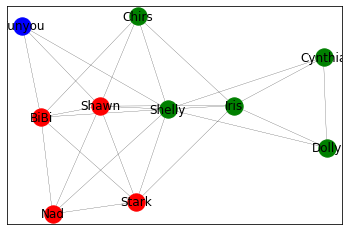

In [23]:
# Set seed (optional)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print out all the nodes with color
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_2, node_color='blue', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

The peopole in green cummunity are my classmates in univeristy and I. We are in the same grade.  
The peopole in red cummunity are my friends, we often play together.  
And there is only one person in blue cummunity, who is my mentor of last internship, but we are good friends now.

## 6. Discuss a few important cases 

1 Shawn has highest degree, who is the most important person.  
2 Xunyou is the only one person in blue cummunity, who is my mentor of last internship. He only knows Shawn, BiBi and I, because we interned in the same company. Maybe Shawn, BiBi, Nad and Stark have colser connection, Xunyou does not know Nad and Stark,so he is in the one-person community.

## 7. Draw some conclusions about this network 

1 Shawn is the perospn who knows most friends of me.  
2 There are three communities in my friends network, one is my classmates' community, another is party communuty, the rest is my mentor himself.  
3 The drgee of Dolly and Cynthia are same; Chris's and Nad's degree are same; Xunyou's and Stark's are same; BiBi's and Iris's are same. The same dregree indicates the same importance in my friends circle. And Shawn has highest degree, who is the most important person.  
4 Dolly, Cynthia, Xunyou have same closeness centrality; Chirs and Nad have same one; Iris and BiBi have same one. This shaws they can connect to rest of my friends in same speed.